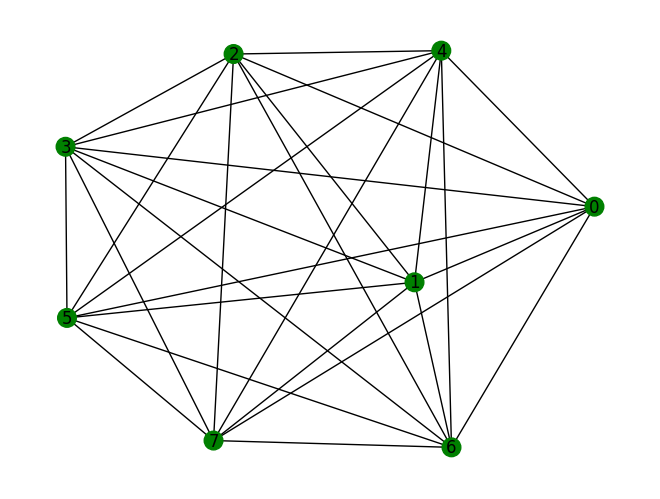

In [6]:
from disqco.circuits.cp_fraction import cp_fraction, cz_fraction
from disqco.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from disqco.parti.FM.FM_methods import set_initial_partitions
from disqco.circuits.QAOA import QAOA_random
from qiskit.circuit.library import QFT, QuantumVolume  
from disqco.graphs.quantum_network import QuantumNetwork, linear_coupling, grid_coupling, random_coupling

import pickle

num_qubits = 64

circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5)

num_qubits = circuit.num_qubits

circuit = transpile(circuit, basis_gates = ['cp', 'u'])

num_partitions = 8


qpu_sizes = [int(num_qubits/num_partitions)+1]*num_partitions

network = QuantumNetwork(qpu_sizes)



network.draw()



In [7]:
from disqco.parti.FM.FM_methods import get_all_configs, get_all_costs_hetero

graph = QuantumCircuitHyperGraph(circuit, group_gates = True, anti_diag = True)
assignment = set_initial_partitions(network=network, num_qubits=num_qubits, depth=graph.depth)

if num_partitions <=10:

    configs = get_all_configs(num_partitions, hetero=True)

    costs, edge_tree = get_all_costs_hetero(network, configs)
else:

    costs = {}

In [8]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive_hetero

final_assignment_list, final_cost_list, _ = MLFM_recursive_hetero(graph,
                                                                    assignment,
                                                                    qpu_sizes,
                                                                    limit=num_qubits,
                                                                    network=network,
                                                                    log=True,
                                                                    stochastic=True,
                                                                    costs={}, 
                                                                    level_limit=None)





Initial cost: 792
All passes complete.
Final cost: 658
Best cost at level 0: 658
Initial cost: 658
All passes complete.
Final cost: 632
Best cost at level 1: 632
Initial cost: 632
All passes complete.
Final cost: 605
Best cost at level 2: 605
Initial cost: 605
All passes complete.
Final cost: 586
Best cost at level 3: 586
Initial cost: 586
All passes complete.
Final cost: 566
Best cost at level 4: 566
Initial cost: 566
All passes complete.
Final cost: 561
Best cost at level 5: 561
Initial cost: 561
All passes complete.
Final cost: 560
Best cost at level 6: 560


In [9]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive
import numpy as np
import time

start = time.time()
assignment_list_MLFMR, cost_list_MLFMR, _ = MLFM_recursive(graph,
                                        assignment,  
                                        qpu_sizes,
                                        limit=num_qubits,
                                        log = True,)
end = time.time()

print(f'Time taken for MLFM: {end - start} seconds')


final_cost_MLFMR = min(cost_list_MLFMR)
final_assignment_MLFMR = assignment_list_MLFMR[np.argmin(cost_list_MLFMR)]
print(f'Final cost: {final_cost_MLFMR}')


Initial cost: 792
All passes complete.
Final cost: 663
Best cost at level 0: 663
Initial cost: 663
All passes complete.
Final cost: 627
Best cost at level 1: 627
Initial cost: 627
All passes complete.
Final cost: 597
Best cost at level 2: 597
Initial cost: 597
All passes complete.
Final cost: 579
Best cost at level 3: 579
Initial cost: 579
All passes complete.
Final cost: 569
Best cost at level 4: 569
Initial cost: 569
All passes complete.
Final cost: 565
Best cost at level 5: 565
Initial cost: 565
All passes complete.
Final cost: 560
Best cost at level 6: 560
Time taken for MLFM: 5.340140104293823 seconds
Final cost: 560
